In [3]:
%matplotlib inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from collections import Counter 

In [5]:
# Flag on whether to use train or dev
TRAIN_STATS = True

file_prefix = "train" if TRAIN_STATS else "dev"
print("Calculating Statistics on %s set..." % file_prefix)

# Open each file and read in each as a list
questions = open("data/%s.question" % file_prefix, "r").readlines()
contexts = open("data/%s.context" % file_prefix, "r").readlines()
spans = open("data/%s.span" % file_prefix, "r").readlines()
answers = open("data/%s.answer" % file_prefix, "r").readlines()

Calculating Statistics on train set...


In [6]:
# Get number of dev examples
assert(len(questions) == len(contexts) == len(spans) == len(answers))
n_examples = len(questions)
print("Number of Examples: %s" % n_examples)

Number of Examples: 86318


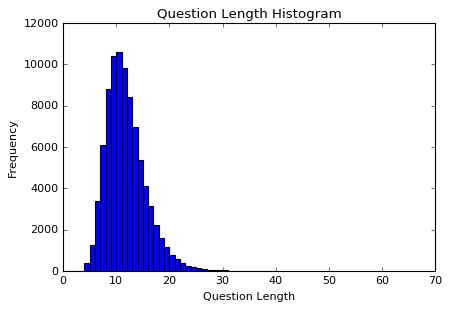

Most Frequent Values:
10 (with Frequency: 10607)
9 (with Frequency: 10382)
11 (with Frequency: 9813)
8 (with Frequency: 8783)
12 (with Frequency: 8400)

Mean: 21.682926829268293
Standard Deviation: 13.311354083309158

25th Percentile: 11.0
50th Percentile: 21.0
75th Percentile: 31.0
90th Percentile: 37.0
95th Percentile: 39.0
99th Percentile: 55.600000000000016


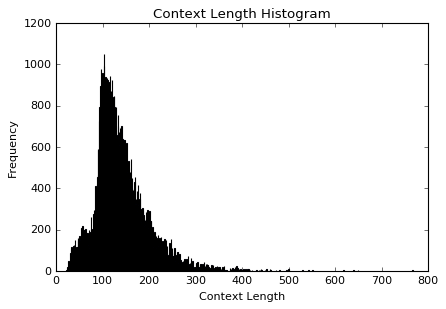

Most Frequent Values:
102 (with Frequency: 1048)
103 (with Frequency: 990)
96 (with Frequency: 978)
99 (with Frequency: 957)
115 (with Frequency: 943)

Mean: 224.89285714285714
Standard Deviation: 128.43095004153565

25th Percentile: 119.75
50th Percentile: 217.5
75th Percentile: 315.25
90th Percentile: 385.90000000000003
95th Percentile: 436.9
99th Percentile: 557.0299999999984


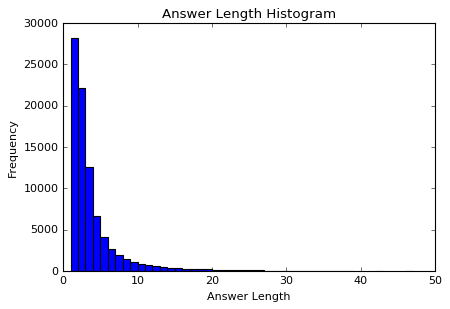

Most Frequent Values:
1 (with Frequency: 28129)
2 (with Frequency: 22194)
3 (with Frequency: 12603)
4 (with Frequency: 6630)
5 (with Frequency: 4093)

Mean: 20.725
Standard Deviation: 11.956143818138019

25th Percentile: 10.75
50th Percentile: 20.5
75th Percentile: 30.25
90th Percentile: 36.1
95th Percentile: 38.19999999999999
99th Percentile: 44.44


In [7]:
def create_histogram_from_counter(counter, name, width=1.0, print_stats=True):
    labels, values = zip(*counter.items())
    
    # Plot Histogram
    plt.bar(labels, values, width=width)
    plt.title("%s Histogram" % name)
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.show()
    
    # Print statistics
    if print_stats:
        print_statistics_from_counter(counter)

def print_statistics_from_counter(counter):
    modes = counter.most_common(5)
    mean = np.mean(counter.keys())
    std = np.std(counter.keys())
    first_perc = np.percentile(counter.keys(), 25)
    second_perc = np.percentile(counter.keys(), 50)
    third_perc = np.percentile(counter.keys(), 75)
    top10_perc = np.percentile(counter.keys(), 90)
    top5_perc = np.percentile(counter.keys(), 95)
    top1_perc = np.percentile(counter.keys(), 99)
    # var = np.var(counter.keys(), dtype=np.float64)
    
    print("Most Frequent Values:")
    for mode in modes:
        print("%s (with Frequency: %s)" % (mode[0], mode[1]))
    print("")
    print("Mean: %s" % mean)
    print("Standard Deviation: %s" % std)
    print("")
    print("25th Percentile: %s" % first_perc)
    print("50th Percentile: %s" % second_perc)
    print("75th Percentile: %s" % third_perc)
    print("90th Percentile: %s" % top10_perc)
    print("95th Percentile: %s" % top5_perc)
    print("99th Percentile: %s" % top1_perc)
    # print("Variance: %s" % var)
    
# Get counters from each list
question_counter = Counter([len(q.split()) for q in questions])
context_counter = Counter([len(c.split()) for c in contexts])
answer_counter = Counter([len(a.split()) for a in answers])
    
# Create length histogram
create_histogram_from_counter(question_counter, "Question Length")
create_histogram_from_counter(context_counter, "Context Length")
create_histogram_from_counter(answer_counter, "Answer Length")

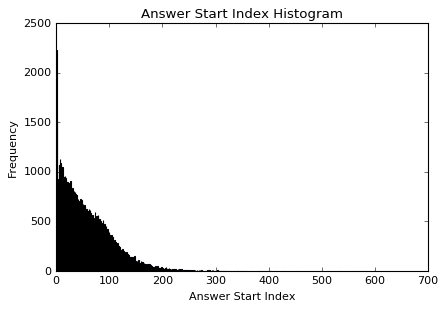

Most Frequent Values:
0 (with Frequency: 2224)
1 (with Frequency: 1513)
7 (with Frequency: 1133)
8 (with Frequency: 1086)
6 (with Frequency: 1070)

Mean: 190.40054495912807
Standard Deviation: 121.75456752664138

25th Percentile: 91.5
50th Percentile: 183.0
75th Percentile: 274.5
90th Percentile: 339.80000000000007
95th Percentile: 384.7
99th Percentile: 576.7999999999995


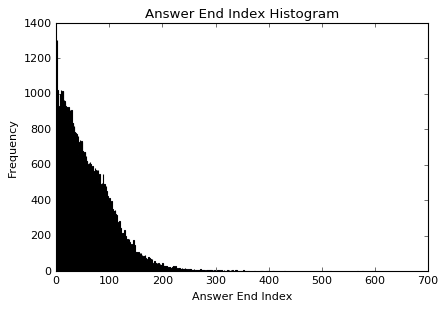

Most Frequent Values:
1 (with Frequency: 1304)
9 (with Frequency: 1024)
2 (with Frequency: 1021)
12 (with Frequency: 1016)
11 (with Frequency: 1015)

Mean: 192.53908355795147
Standard Deviation: 122.93800273146698

25th Percentile: 92.5
50th Percentile: 185.0
75th Percentile: 277.5
90th Percentile: 342.0
95th Percentile: 391.0
99th Percentile: 581.7000000000003


In [8]:
# Get counters from each list
span_starts, span_ends = zip(*[s.split() for s in spans])
span_starts = [int(start) for start in span_starts]
span_ends = [int(end) for end in span_ends]

# Create Histograms about where in the Context the Answer appears
create_histogram_from_counter(Counter(span_starts), "Answer Start Index")
create_histogram_from_counter(Counter(span_ends), "Answer End Index")

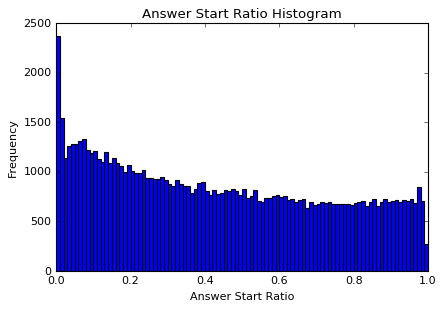

Most Frequent Values:
0.0 (with Frequency: 2366)
0.01 (with Frequency: 1546)
0.07 (with Frequency: 1329)
0.06 (with Frequency: 1307)
0.05 (with Frequency: 1284)

Mean: 0.49500000000000016
Standard Deviation: 0.28866070047722114

25th Percentile: 0.2475
50th Percentile: 0.495
75th Percentile: 0.7424999999999999
90th Percentile: 0.891
95th Percentile: 0.9404999999999999
99th Percentile: 0.9801


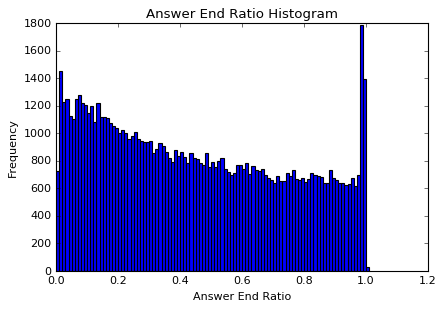

Most Frequent Values:
0.98 (with Frequency: 1786)
0.01 (with Frequency: 1448)
0.99 (with Frequency: 1397)
0.07 (with Frequency: 1277)
0.06 (with Frequency: 1249)

Mean: 0.5000000000000001
Standard Deviation: 0.291547594742265

25th Percentile: 0.25
50th Percentile: 0.5
75th Percentile: 0.75
90th Percentile: 0.9
95th Percentile: 0.95
99th Percentile: 0.99


In [9]:
# Create histogram for relative position of answer in context
context_lengths = [len(c.split()) for c in contexts]

start_ratios = []
end_ratios = []
for idx in range(n_examples):
    start, end = span_starts[idx], span_ends[idx]
    length = context_lengths[idx]
    
    start_ratio = round(start / float(length), 2)
    end_ratio = round(end / float(length), 2)
    
    start_ratios.append(start_ratio)
    end_ratios.append(end_ratio)

# Create Histograms where (Relative) in the Context the Answer appears
create_histogram_from_counter(Counter(start_ratios), "Answer Start Ratio", width=0.01, print_stats=True)
create_histogram_from_counter(Counter(end_ratios), "Answer End Ratio", width=0.01, print_stats=True)